# Vlasov-Poisson equation

$$
\frac{\partial f}{\partial t}+ v\cdot \nabla_x f + E(t,x) \cdot \nabla_v f =0,
$$
$$
\rho(t,x) = \int f(t,x,v)dv,
$$
$$
E(t,x) = \int \rho(t,x,v)dx  - \bar{\rho},
$$





# Landau Damping

In [5]:
import numpy as np

In [22]:
v_x = np.linspace(0,4.0*np.pi,100)
v_v = np.linspace(-6.0,6.0, 100)

x, v = np.meshgrid(v_x, v_v)

eps = 0.05
kx  = 0.5 

f = (1.0+eps*np.cos(kx*x))/(2.0*np.pi)* np.exp(-0.5*v*v)

In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

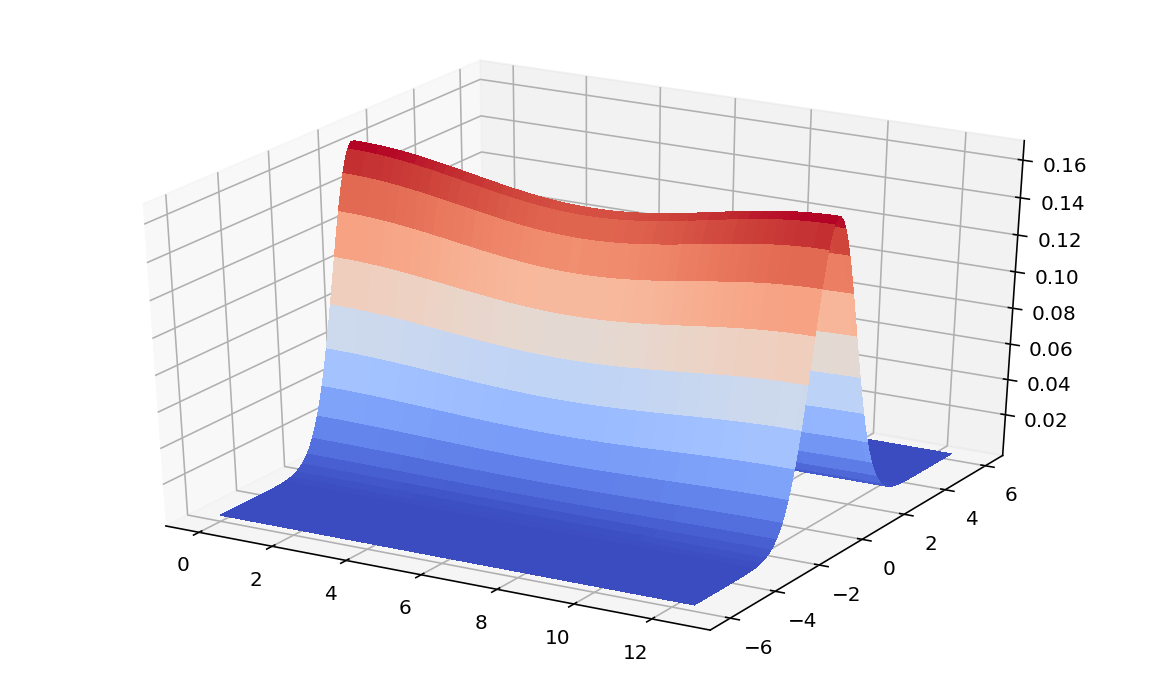

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (10.0, 6.0)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, v, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [ ]:
import numpy as np
from math import floor

class Interpolator():
    
    num_terms = 27
    
    def __init__(self, n, xmin, xmax):
        
        assert ( n > self.num_terms)
        self.n      = n
        self.xmin   = xmin
        self.xmax   = xmax
        self.delta  = (xmax - xmin) / (n-1)
        self.rdelta = 1.0 / self.delta
        self.d      = np.zeros(n)
        self.coeffs = np.zeros(n+3)
        
    def compute_interpolants( self, f ):
        
        n = self.n
        num_terms = self.num_terms
        a=np.sqrt((2.0+np.sqrt(3.0))/6.0)
        r_a = 1.0/a
        b=np.sqrt((2.0-np.sqrt(3.0))/6.0)
        b_a = b/a

        d1 = f[0]
        coeff_tmp = 1.0
        for i in range(num_terms):
           coeff_tmp *= (-b_a)
           d1 = d1 + coeff_tmp*f[n-2-i]

        self.d[0] = d1*r_a
        for i in range(1,n-1):
           self.d[i] = r_a*(f[i] - b*self.d[i-1])
        
        d1        = self.d[-2]
        coeff_tmp = 1.0
        for i in range(num_terms):
           coeff_tmp *= (-b_a)
           d1 = d1 + coeff_tmp*self.d[i]

        self.coeffs[n-1] = d1*r_a
    
        for i in range(n-2, 0, -1):
           self.coeffs[i] = r_a*(self.d[i-1] - b*self.coeffs[i+1])

        self.coeffs[0]  = self.coeffs[-4]
        self.coeffs[-3] = self.coeffs[1]
        self.coeffs[-2] = self.coeffs[2]
        self.coeffs[-1] = self.coeffs[3]
        
    def interpolate( self, x ):
        
        num_cells = self.n-1
        rh        = self.rdelta
        for i in range(n):
           t0       = (x[i]-self.xmin)*rh
           cell     = floor(t0)
           dx       = t0 - cell
           cdx      = 1.0 - dx
           cim1     = self.coeffs[cell]
           ci       = self.coeffs[cell+1]
           cip1     = self.coeffs[cell+2]
           cip2     = self.coeffs[cell+3]
           t1       = 3.0*ci
           t3       = 3.0*cip1
           t2       = cdx*(cdx*(cdx*(cim1 - t1) + t1) + t1) + ci
           t4       =  dx*( dx*( dx*(cip2 - t3) + t3) + t3) + cip1
           self.d[i]     = (1.0/6.0)*(t2 + t4)

        return self.d   

In [ ]:
%load_ext heat_magic

In [63]:
n =30
cs = Interpolator(n,0,1)
x = np.linspace(0,1,30)
y = np.sin(x*2*np.pi)
x_new = x.min() + np.random.random(n) * (x.max() - x.min())

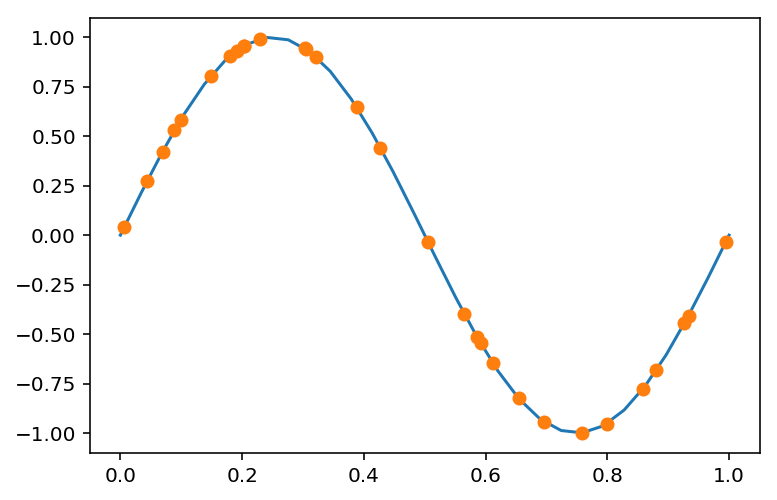

In [65]:
cs.compute_interpolants(y)
plt.plot(x, y, '-', x_new, cs.interpolate(x_new), 'o');